In [1]:
import re
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obj_parser = re.compile(r'\d+.\d+ \d+')
run_time = re.compile(r'Elapsed time: \d+')

In [8]:
def parse_file(file_name, obj_parser, run_time):
    its_a_dict = {} #in ms, key is number of threads
    avr_time = [];
    f = open(file_name, 'r')
    num_lines = 0
    for line in f:
        num_lines += 1
        if re.match(obj_parser, line):
            obj_and_point = re.findall(obj_parser,line)[0].split()
            point = float(obj_and_point[1])
            obj_value = float(obj_and_point[0])
            if  point in its_a_dict.keys(): #key is filter length
                its_a_dict[point].append(obj_value)
            else:
                its_a_dict[point] = [obj_value]
        if re.match(run_time, line):
            avr_time.append(float(re.findall(r'\d+',line)[0]))
        else:
            #print("No matching pattern found at line number: ", num_lines, " line ", line)
            continue
    f.close()
    for key in its_a_dict:
        #print len(its_a_dict[key])
        its_a_dict[key] = np.mean(its_a_dict[key])
    return (its_a_dict,np.mean(avr_time))

('Number of threads:%d time:%d', 1, 959.39999999999998)
('Hogwild with number of threads:%d time:%d', 2, 661.0)
('Not Hogwild with number of threads:%d time:%d', 2, 931.10000000000002)
('Hogwild with number of threads:%d time:%d', 4, 494.5)
('Not Hogwild with number of threads:%d time:%d', 4, 998.60000000000002)


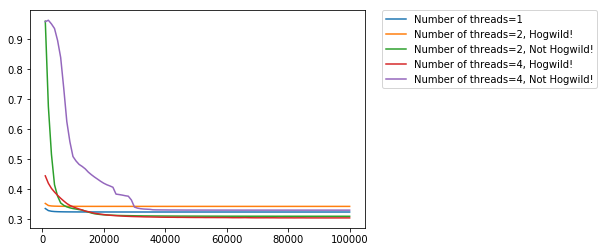

In [10]:
num_comp = 1
num_threads = 1
file_name = './exp_files/1_{}_04_nothogwild.txt'.format(num_comp)
(dic,avr_time) = parse_file(file_name, obj_parser, run_time)
print("Number of threads:%d time:%d", num_threads, avr_time)
pl_list = [(k,dic[k]) for k in dic]
pl_list = sorted(pl_list, key=lambda tup: tup[0])
plt.plot(*zip(*pl_list[1:]), label="Number of threads=1")
for num_threads in [2,4]:
    file_name = './exp_files/{}_{}_04_hogwild.txt'.format(num_threads,num_comp)
    (dic,avr_time) = parse_file(file_name, obj_parser, run_time)
    print("Hogwild with number of threads:%d time:%d", num_threads, avr_time)
    pl_list = [(k,dic[k]) for k in dic]
    pl_list = sorted(pl_list, key=lambda tup: tup[0])
    plt.plot(*zip(*pl_list[1:]), label="Number of threads={}, Hogwild!".format(num_threads))
    file_name = './exp_files/{}_{}_04_nothogwild.txt'.format(num_threads,num_comp)
    (dic,avr_time) = parse_file(file_name, obj_parser, run_time)
    print("Not Hogwild with number of threads:%d time:%d", num_threads, avr_time)
    pl_list = [(k,dic[k]) for k in dic]
    pl_list = sorted(pl_list, key=lambda tup: tup[0])
    plt.plot(*zip(*pl_list[1:]), label="Number of threads={}, Not Hogwild!".format(num_threads))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()